In [235]:
%matplotlib inline

In [236]:
#导入包
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [237]:
#求梯度
def gradient(X,w,y,C):
    if(len(y)!=len(X)):
        raise "y和X长度不同"
    if(len(X[0])!=len(w)):
        raise "X的列数与w的长度不同"
    g = w.copy()
    for l in range(len(X)):
        if(1-y[l]*w.dot(X[l])<=0):
            continue
        g -= C*y[l]*X[l]
    return g/len(X)
#求损失函数
def Hinge_loss(X,w,y,C):
    if(len(y)!=len(X)):
        raise "y和X长度不同"
    if(len(X[0])!=len(w)):
        raise "X的列数与w的长度不同"
    loss = 0
    for l in range(len(X)):
        if(1-y[l]*w.dot(X[l])<=0):
            continue
        loss= loss+1-y[l]*w.dot(X[l])
    return (C*loss+0.5*w.dot(w))/len(y)
#计算准确率
def correct_rate(X,w,y):
    if(len(y)!=len(X)):
        raise "y和X长度不同"
    if(len(X[0])!=len(w)):
        raise "X的列数与w的长度不同"
    correct_count = 0
    for i in range(len(y)):
        if(w.dot(X[i])*y[i]> 0):
            correct_count +=1
    return correct_count/len(y)

准确率为： 0.8508771929824561


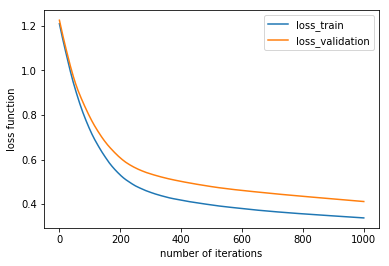

In [238]:
#读取数据
X,y = load_svmlight_file("australian_scale.txt")
X = X.toarray()
#为X添加一维值为 1 的特征
ones = [[1]]*len(X)
X = np.concatenate((X,ones),axis = 1)
#划分训练集合测试集
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size = 0.33,random_state = 33)
#参数初始化
w = np.ones(len(X[0]))
#给定学习率和损失函数的权重
learning_rate = 0.01
C = 0.9
#保存每次迭代的损失函数的值
loss_train = [Hinge_loss(X_train,w,y_train,C)]
loss_validation = [Hinge_loss(X_validation,w,y_validation,C)]
#迭代更新参数
for i in range(1000):
    w -= learning_rate * gradient(X_train,w,y_train,C)
    loss_train.append(Hinge_loss(X_train,w,y_train,C))
    loss_validation.append(Hinge_loss(X_validation,w,y_validation,C))

#绘制损失函数变化图
plt.plot(range(1001),loss_train ,label="loss_train",)
plt.plot(range(1001),loss_validation ,label="loss_validation")
plt.legend(loc = "best")
ax = plt.gca()
ax.set_xlabel("number of iterations")
ax.set_ylabel("loss function")
print("准确率为：",correct_rate(X_validation,w,y_validation))